In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [3]:
##Getting data
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
##info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
##Proceeding data
df = df.rename({"#Passengers": "Passengers"}, axis=1)
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")
df.dtypes

Passengers    int64
dtype: object

In [6]:
##Spliting data
train = df.iloc[:len(df)-18]
test = df.iloc[len(df)-18:]
train

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-02-01,342
1959-03-01,406
1959-04-01,396


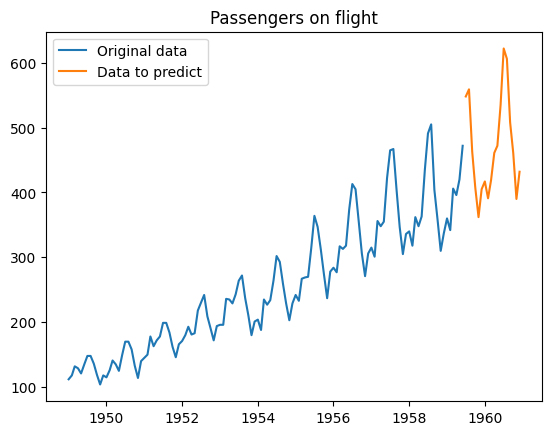

In [7]:
##Making plot
plt.plot(train, label="Original data")
plt.plot(test, label="Data to predict")
plt.title("Passengers on flight")
plt.legend()
plt.show()

In [8]:
##Making test for stationarity
test_for_stationary = adfuller(train)
test_for_stationary

(0.15750924509325598,
 0.9697751550572073,
 13,
 112,
 {'1%': -3.4901313156261384,
  '5%': -2.8877122815688776,
  '10%': -2.5807296460459184},
 843.2884299850001)

In [9]:
##Making differintiation 
train["diff"] = train["Passengers"].diff()
train = train.dropna()
test_for_stationary = adfuller(train["diff"])
test_for_stationary[1]

C:\Users\ylokt\AppData\Local\Temp\ipykernel_23664\3205335475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["diff"] = train["Passengers"].diff()


0.03941787663223591

In [10]:
##Looking for the most suitable parameters
model = auto_arima(train["Passengers"], start_p=0, start_q=0, max_p=5, max_q=5, d=None, seasonal=False, trace=True)
model.summary()

C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\d

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1192.345, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1186.061, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1183.401, Time=0.08 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1191.528, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1175.695, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1180.218, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1184.166, Time=0.06 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1174.636, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1182.195, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1184.845, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1170.532, Time=0.06 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\d

 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1183.189, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1171.528, Time=0.13 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1171.127, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1173.782, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1183.776, Time=0.06 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1165.466, Time=0.19 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1160.392, Time=0.39 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1169.106, Time=0.20 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1162.349, Time=0.23 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=1154.980, Time=0.42 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.53 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=1156.907, Time=0.60 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0]             : AIC=inf, Time=0.51 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0]             : AIC=1152.745, Time=0.47 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=inf, Time=0.66 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(0,0,0)[0]             : AIC=inf, Time=0.86 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1170.142, Time=0.23 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(0,0,0)[0]             : AIC=inf, Time=0.51 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(0,0,0)[0]             : AIC=inf, Time=0.51 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec

Best model:  ARIMA(3,1,4)(0,0,0)[0]          
Total fit time: 8.690 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  125
Model:               SARIMAX(3, 1, 4)   Log Likelihood                -568.373
Date:                Wed, 25 Dec 2024   AIC                           1152.745
Time:                        16:25:27   BIC                           1175.307
Sample:                    02-01-1949   HQIC                          1161.911
                         - 06-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7063      0.151      4.688      0.000       0.411       1.002
ar.L2         -0.6114      0.145     -4.226      0.000      -0.895      -0.328
ar.L3         -0.1625      0.141     -1.155      0.248      -0.438       0.113
ma.L1         -0.4971      0.113     -4.384      0.000      -0.719      -0.275
ma.L2          0.2099      0.088      2.376      0.018       0.037       0.383
ma.L3          0.5454      0.095      5.746      0.000       0.359       0.731
ma.L4         -0.6798      0.082     -8.266      0.000      -0.841      -0.519
sigma2       536.0622     95.477      5.615      0.000     348.931     723.193
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.69
Prob(Q):                              0.93   Prob(JB):                         0.16
Heteroskedasticity (H):               6.05   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
##Building the model
model = ARIMA(train['Passengers'], order=(4,1,3))
model_fit = model.fit()
model_fit.summary()

C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  125
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -569.490
Date:                Wed, 25 Dec 2024   AIC                           1154.980
Time:                        16:25:27   BIC                           1177.542
Sample:                    02-01-1949   HQIC                          1164.145
                         - 06-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5370      0.114     -4.702      0.000      -0.761      -0.313
ar.L2          0.4553      0.119      3.811      0.000       0.221       0.689
ar.L3          0.1814      0.134      1.352      0.176      -0.082       0.444
ar.L4         -0.4883      0.087     -5.643      0.000      -0.658      -0.319
ma.L1          0.8690      0.104      8.342      0.000       0.665       1.073
ma.L2         -0.5622      0.143     -3.920      0.000      -0.843      -0.281
ma.L3         -0.7100      0.109     -6.484      0.000      -0.925      -0.495
sigma2       559.0499     78.292      7.141      0.000     405.600     712.500
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 5.39
Prob(Q):                              0.49   Prob(JB):                         0.07
Heteroskedasticity (H):               4.34   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
##Making a forecast
forecast = model_fit.forecast(steps=18)
forecast = forecast
forecast

1959-07-01    452.105138
1959-08-01    454.251434
1959-09-01    410.889741
1959-10-01    406.151561
1959-11-01    399.057078
1959-12-01    391.797122
1960-01-01    412.778888
1960-02-01    399.233970
1960-03-01    418.207397
1960-04-01    409.202682
1960-05-01    409.974756
1960-06-01    415.515220
1960-07-01    401.994177
1960-08-01    416.313894
1960-09-01    403.096536
1960-10-01    411.555913
1960-11-01    410.194931
1960-12-01    405.388009
Freq: MS, Name: predicted_mean, dtype: float64

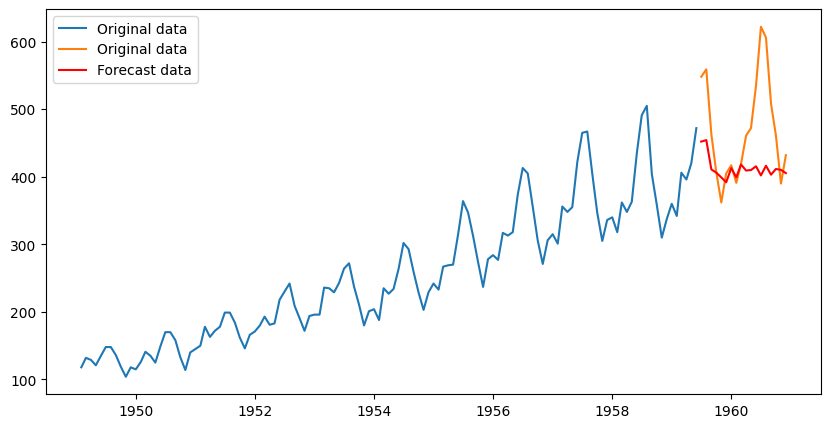

In [13]:
##Visualizing the data
plt.figure(figsize=(10,5))
plt.plot(train['Passengers'], label="Original data")
plt.plot(test, label="Original data")
plt.plot(forecast, color="red", label="Forecast data")
plt.legend()
plt.show()

In [14]:
###Looking for another way(setting differentiated data, making predictions and making reverse operation with the results)
model = auto_arima(train["diff"], start_p=0, start_q=0, max_p=5, max_q=5, d=None, seasonal=False, trace=True)
model.summary()

C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\d

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1200.159, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1193.371, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1190.695, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1183.165, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1178.916, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1191.681, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1179.911, Time=0.12 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1179.636, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1182.201, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1192.254, Time=0.05 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1173.892, Time=0.19 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1168.810, Time=0.18 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1177.481, Time=0.14 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=1170.755, Time=0.16 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=1163.179, Time=0.46 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.55 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0]             : AIC=1165.006, Time=0.76 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=0.54 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=0.44 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=0.62 sec


C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec

Best model:  ARIMA(4,0,3)(0,0,0)[0]          
Total fit time: 5.282 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  125
Model:               SARIMAX(4, 0, 3)   Log Likelihood                -573.589
Date:                Wed, 25 Dec 2024   AIC                           1163.179
Time:                        16:25:33   BIC                           1185.805
Sample:                    02-01-1949   HQIC                          1172.371
                         - 06-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5361      0.113     -4.730      0.000      -0.758      -0.314
ar.L2          0.4554      0.119      3.842      0.000       0.223       0.688
ar.L3          0.1810      0.133      1.359      0.174      -0.080       0.442
ar.L4         -0.4893      0.086     -5.698      0.000      -0.658      -0.321
ma.L1          0.8684      0.103      8.401      0.000       0.666       1.071
ma.L2         -0.5614      0.142     -3.941      0.000      -0.841      -0.282
ma.L3         -0.7095      0.109     -6.513      0.000      -0.923      -0.496
sigma2       554.7229     76.863      7.217      0.000     404.074     705.371
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):                 5.46
Prob(Q):                              0.49   Prob(JB):                         0.07
Heteroskedasticity (H):               4.35   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
##Building model with the most suitable parameters
model = ARIMA(train['diff'], order=(4,0,3))
model_fit = model.fit()
model_fit.summary()

C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ylokt\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ylokt\AppData\Local

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  125
Model:                 ARIMA(4, 0, 3)   Log Likelihood                -564.287
Date:                Wed, 25 Dec 2024   AIC                           1146.574
Time:                        16:25:34   BIC                           1172.028
Sample:                    02-01-1949   HQIC                          1156.915
                         - 06-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5158      0.136     18.495      0.000       2.249       2.782
ar.L1         -0.5631      0.078     -7.198      0.000      -0.716      -0.410
ar.L2          0.4323      0.091      4.729      0.000       0.253       0.611
ar.L3          0.1988      0.091      2.180      0.029       0.020       0.378
ar.L4         -0.5452      0.073     -7.440      0.000      -0.689      -0.402
ma.L1          0.7574     54.111      0.014      0.989    -105.298     106.813
ma.L2         -0.7650     95.048     -0.008      0.994    -187.055     185.525
ma.L3         -0.9924     53.636     -0.019      0.985    -106.117     104.132
sigma2       447.7767   2.42e+04      0.018      0.985    -4.7e+04    4.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                11.14
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               4.85   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
##Making forecast and making the cumulative sum operation
forecast = model_fit.forecast(steps=18)
forecast = forecast.cumsum()+ train["Passengers"].iloc[-1]

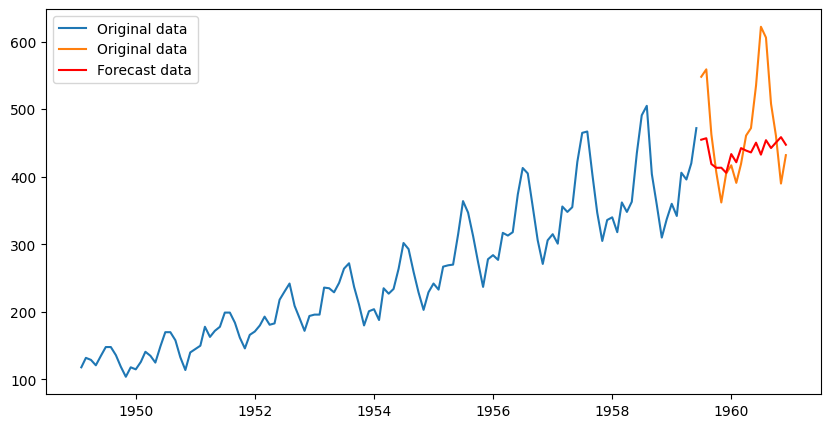

In [17]:
##Visualizing the data
plt.figure(figsize=(10,5))
plt.plot(train["Passengers"], label="Original data")
plt.plot(test, label="Original data")
plt.plot(forecast, color="red", label="Forecast data")
plt.legend()
plt.show()